# Module End Exam - Practical Machine Learning

- Name - Vaibhav Khandekar
- Enrollment Number - 230340325073

# Fraud Detection Case Study

## Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

## Loading dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DBDA/7/Module End/Fraud.csv')
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [3]:
df.shape

(6362620, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

## Checking null values

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Analyzing 'type' column

In [7]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [8]:
df.type.value_counts()*100 / df.shape[0]

CASH_OUT    35.166331
PAYMENT     33.814608
CASH_IN     21.992261
TRANSFER     8.375622
DEBIT        0.651178
Name: type, dtype: float64

<Axes: xlabel='type', ylabel='count'>

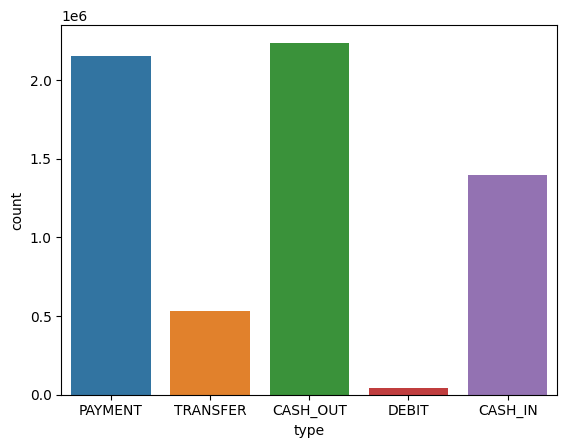

In [9]:
sb.countplot(data=df, x=df.type)

In [10]:
type = df.type.value_counts()
transaction = type.index
quantity = type.values
figure = px.pie(df, values = quantity, names = transaction, hole = 0.5, title = 'Distribution of Transaction')
figure.show()

## Analyzing 'isFlaggedFraud' column

In [11]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [12]:
df.isFlaggedFraud.value_counts()*100 / df.shape[0]

0    99.999749
1     0.000251
Name: isFlaggedFraud, dtype: float64

<Axes: xlabel='isFlaggedFraud', ylabel='count'>

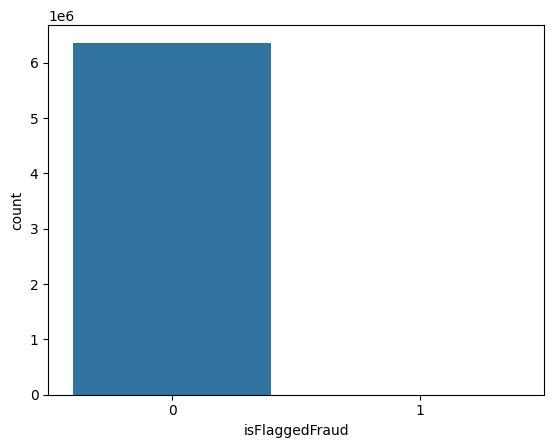

In [13]:
sb.countplot(data = df, x = df.isFlaggedFraud)

### Printing subset of 'isFlaggedFraud'

In [14]:
df[df['isFlaggedFraud']==1]

step      type       amount     nameOrig  oldbalanceOrg  \
2736446   212  TRANSFER   4953893.08   C728984460     4953893.08   
3247297   250  TRANSFER   1343002.08  C1100582606     1343002.08   
3760288   279  TRANSFER    536624.41  C1035541766      536624.41   
5563713   387  TRANSFER   4892193.09   C908544136     4892193.09   
5996407   425  TRANSFER  10000000.00   C689608084    19585040.37   
5996409   425  TRANSFER   9585040.37   C452586515    19585040.37   
6168499   554  TRANSFER   3576297.10   C193696150     3576297.10   
6205439   586  TRANSFER    353874.22  C1684585475      353874.22   
6266413   617  TRANSFER   2542664.27   C786455622     2542664.27   
6281482   646  TRANSFER  10000000.00    C19004745    10399045.08   
6281484   646  TRANSFER    399045.08   C724693370    10399045.08   
6296014   671  TRANSFER   3441041.46   C917414431     3441041.46   
6351225   702  TRANSFER   3171085.59  C1892216157     3171085.59   
6362460   730  TRANSFER  10000000.00  C2140038573    17316255.05   
6362462   730  TRANSFER   7316255.05  C1869569059    17316255.05   
6362584   741  TRANSFER   5674547.89   C992223106     5674547.89   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
2736446      4953893.08   C639921569             0.0             0.0        1   
3247297      1343002.08  C1147517658             0.0             0.0        1   
3760288       536624.41  C1100697970             0.0             0.0        1   
5563713      4892193.09   C891140444             0.0             0.0        1   
5996407     19585040.37  C1392803603             0.0             0.0        1   
5996409     19585040.37  C1109166882             0.0             0.0        1   
6168499      3576297.10   C484597480             0.0             0.0        1   
6205439       353874.22  C1770418982             0.0             0.0        1   
6266413      2542664.27   C661958277             0.0             0.0        1   
6281482     10399045.08  C1806199534             0.0             0.0        1   
6281484     10399045.08  C1909486199             0.0             0.0        1   
6296014      3441041.46  C1082139865             0.0             0.0        1   
6351225      3171085.59  C1308068787             0.0             0.0        1   
6362460     17316255.05  C1395467927             0.0             0.0        1   
6362462     17316255.05  C1861208726             0.0             0.0        1   
6362584      5674547.89  C1366804249             0.0             0.0        1   

         isFlaggedFraud  
2736446               1  
3247297               1  
3760288               1  
5563713               1  
5996407               1  
5996409               1  
6168499               1  
6205439               1  
6266413               1  
6281482               1  
6281484               1  
6296014               1  
6351225               1  
6362460               1  
6362462               1  
6362584               1

## Analyzing 'isFraud' column

In [15]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [16]:
df.isFraud.value_counts()*100 / df.shape[0]

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

<Axes: xlabel='isFraud', ylabel='count'>

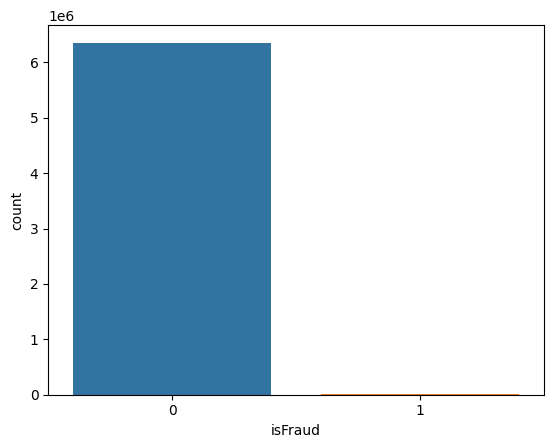

In [17]:
sb.countplot(data = df, x = df.isFraud)

### Printing subset of 'isFraud'

In [18]:
df[df['isFraud']==1]

step      type       amount     nameOrig  oldbalanceOrg  \
2           1  TRANSFER       181.00  C1305486145         181.00   
3           1  CASH_OUT       181.00   C840083671         181.00   
251         1  TRANSFER      2806.00  C1420196421        2806.00   
252         1  CASH_OUT      2806.00  C2101527076        2806.00   
680         1  TRANSFER     20128.00   C137533655       20128.00   
681         1  CASH_OUT     20128.00  C1118430673       20128.00   
724         1  CASH_OUT    416001.33   C749981943           0.00   
969         1  TRANSFER   1277212.77  C1334405552     1277212.77   
970         1  CASH_OUT   1277212.77   C467632528     1277212.77   
1115        1  TRANSFER     35063.63  C1364127192       35063.63   
1116        1  CASH_OUT     35063.63  C1635772897       35063.63   
1869        1  TRANSFER     25071.46   C669700766       25071.46   
1870        1  CASH_OUT     25071.46  C1275464847       25071.46   
1911        1  CASH_OUT    132842.64    C13692003        4499.08   
2301        1  TRANSFER    235238.66  C1872047468      235238.66   
2302        1  CASH_OUT    235238.66  C1499825229      235238.66   
3059        2  TRANSFER   1096187.24  C1093223281     1096187.24   
3060        2  CASH_OUT   1096187.24    C77163673     1096187.24   
3162        2  TRANSFER    963532.14  C1440057381      963532.14   
3163        2  CASH_OUT    963532.14   C430329518      963532.14   
3271        2  TRANSFER     14949.84   C140702728       14949.84   
3272        2  CASH_OUT     14949.84   C395257482       14949.84   
3683        2  TRANSFER     18627.02  C1375503918       18627.02   
3684        2  CASH_OUT     18627.02   C175961135       18627.02   
4103        3  TRANSFER     10539.37  C1134864869       10539.37   
4104        3  CASH_OUT     10539.37  C1984954272       10539.37   
4260        3  TRANSFER     22877.00  C1247938090       22877.00   
4261        3  CASH_OUT     22877.00  C2126545173       22877.00   
4440        4  TRANSFER  10000000.00     C7162498    12930418.44   
4441        4  CASH_OUT  10000000.00   C351297720    10000000.00   
4442        4  TRANSFER   2930418.44  C2047521920     2930418.44   
4443        4  CASH_OUT   2930418.44  C2044690596     2930418.44   
4667        4  TRANSFER    169941.73   C540962910      169941.73   
4668        4  CASH_OUT    169941.73  C2026325575      169941.73   
4693        4  TRANSFER     13707.11    C17222024       13707.11   
4694        4  CASH_OUT     13707.11   C556223230       13707.11   
4775        4  TRANSFER     86070.17  C1844941220       86070.17   
4776        4  CASH_OUT     86070.17  C1699873763       86070.17   
4857        5  TRANSFER    120074.73  C1409933277      120074.73   
4858        5  CASH_OUT    120074.73  C1174000532      120074.73   
5123        5  TRANSFER     60726.57   C383882703       60726.57   
5124        5  CASH_OUT     60726.57   C840095827       60726.57   
5466        5  TRANSFER     10119.47  C1775746074       10119.47   
5467        5  CASH_OUT     10119.47   C213063852       10119.47   
5558        6  TRANSFER     33332.86  C2025652936       33332.86   
5559        6  CASH_OUT     33332.86   C685428529       33332.86   
5746        6  TRANSFER     25975.86   C864622150       25975.86   
5747        6  CASH_OUT     25975.86  C1004271827       25975.86   
5852        6  TRANSFER     26768.50   C457596841       26768.50   
5853        6  CASH_OUT     26768.50   C682812632       26768.50   
5994        6  TRANSFER     30521.02   C903383636       30521.02   
5995        6  CASH_OUT     30521.02  C1813769162       30521.02   
6583        6  TRANSFER    216422.00   C666642000      216422.00   
6584        6  CASH_OUT    216422.00  C1547714604      216422.00   
6702        6  TRANSFER     17320.91   C788790720       17320.91   
6703        6  CASH_OUT     17320.91   C436661284       17320.91   
6706        6  TRANSFER     17246.00  C1034673425       17246.00   
6707        6  CASH_OUT     17246.00  C1484518113       17246.00 

## Dropping column 'isFlaggedFraud'

In [19]:
df.drop("isFlaggedFraud",axis = 1, inplace = True)

In [20]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0

## Creating new dataframe for the subset of 'isFraud'

In [21]:
fraud_df = df[df['isFraud']==1]

<Axes: xlabel='step', ylabel='Count'>

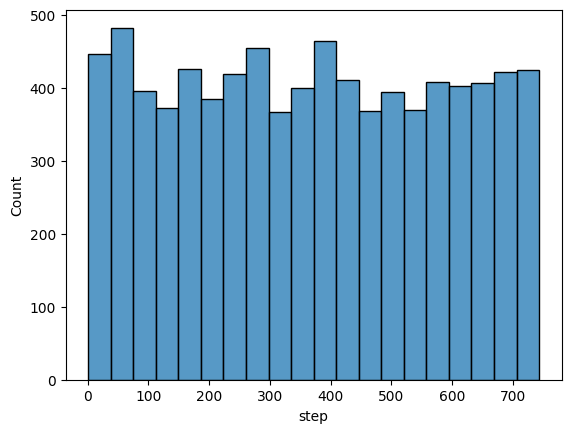

In [22]:
sb.histplot(data = fraud_df, x="step")

In [23]:
df.drop("step",axis=1,inplace=True)

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64


<Axes: xlabel='type', ylabel='count'>

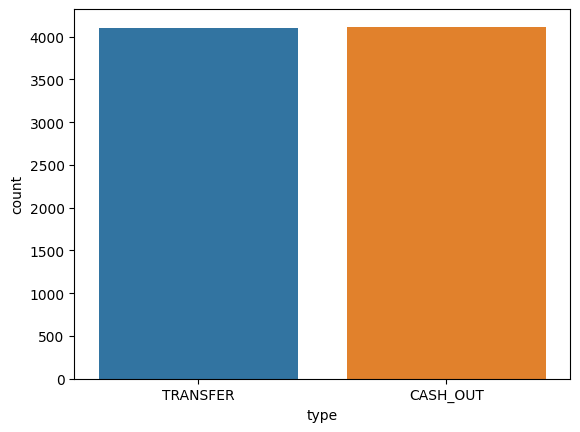

In [24]:
print(fraud_df.type.value_counts())
sb.countplot(data=fraud_df,x="type")

## In types only transfer and cash out data are the only ones in which fraud took place**

- Hence we will change all other types  to other

In [25]:
df["type"] = df["type"].apply(lambda x : "OTHER" if x not in ["TRANSFER","CASH_OUT"] else x )

In [26]:
np.unique(df.type)

array(['CASH_OUT', 'OTHER', 'TRANSFER'], dtype=object)

In [27]:
df["NaOr"] = df["nameOrig"].apply(lambda x : x.strip()[0])
df["NaDe"] = df["nameDest"].apply(lambda x : x.strip()[0])

In [28]:
df.iloc[:,-2:].value_counts()

NaOr  NaDe
C     C       4211125
      M       2151495
dtype: int64

## Transactions are happening between customer to customer and customer to merchant

In [29]:
df.drop(["NaOr","nameOrig","nameDest"],axis=1,inplace=True)

In [30]:
df.head()

type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     OTHER   9839.64       170136.0       160296.36             0.0   
1     OTHER   1864.28        21249.0        19384.72             0.0   
2  TRANSFER    181.00          181.0            0.00             0.0   
3  CASH_OUT    181.00          181.0            0.00         21182.0   
4     OTHER  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud NaDe  
0             0.0        0    M  
1             0.0        0    M  
2             0.0        1    C  
3             0.0        1    C  
4             0.0        0    M

type      NaDe
CASH_OUT  C       2237500
OTHER     M       2151495
          C       1440716
TRANSFER  C        532909
dtype: int64


<Axes: xlabel='type', ylabel='count'>

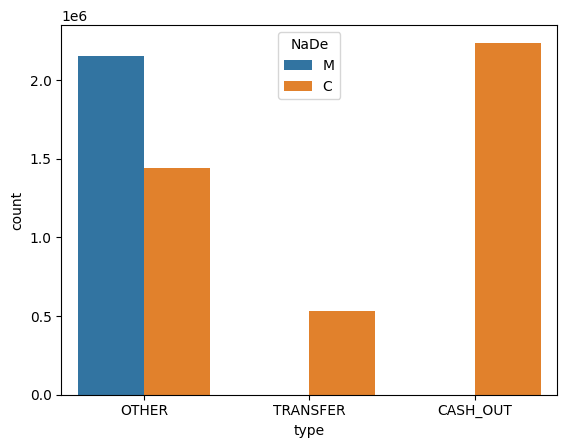

In [31]:
print(df.loc[:,["type","NaDe"]].value_counts())
sb.countplot(data=df,x="type",hue="NaDe")

In [32]:
df.drop("NaDe",axis=1,inplace=True)

In [33]:
df.head()

type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     OTHER   9839.64       170136.0       160296.36             0.0   
1     OTHER   1864.28        21249.0        19384.72             0.0   
2  TRANSFER    181.00          181.0            0.00             0.0   
3  CASH_OUT    181.00          181.0            0.00         21182.0   
4     OTHER  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  
0             0.0        0  
1             0.0        0  
2             0.0        1  
3             0.0        1  
4             0.0        0

<ipython-input-34-4ec05473e443>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

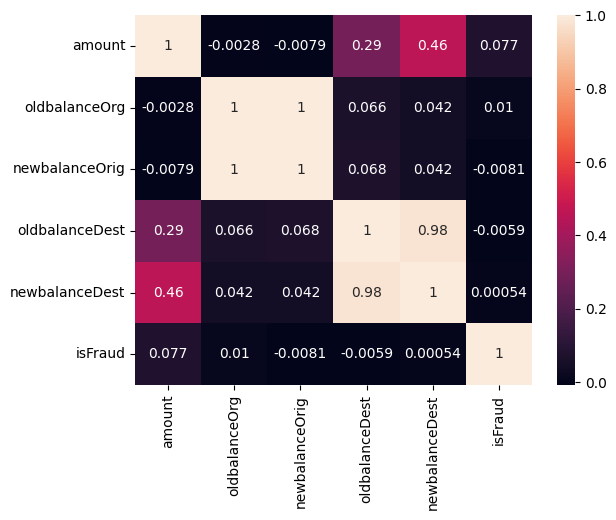

In [34]:
sb.heatmap(df.corr(),annot=True)

In [35]:
df.drop(["oldbalanceOrg","newbalanceDest"],axis=1,inplace=True)

<ipython-input-36-4ec05473e443>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

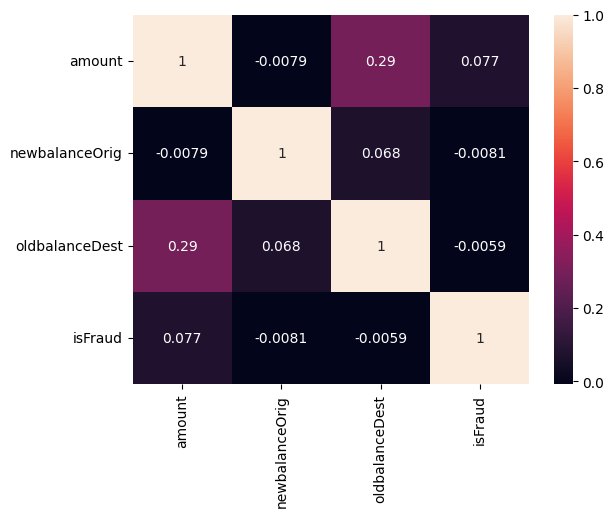

In [36]:
sb.heatmap(df.corr(),annot=True)

<Axes: >

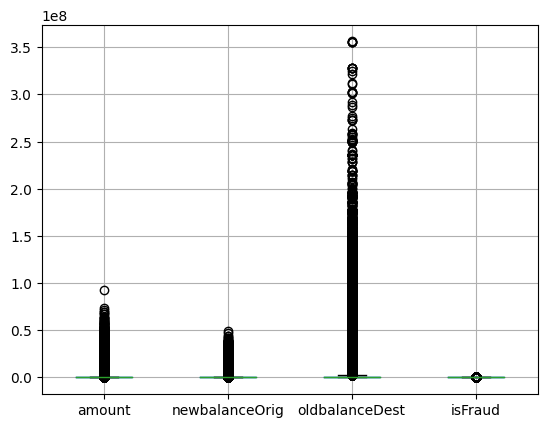

In [37]:
df.boxplot()

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

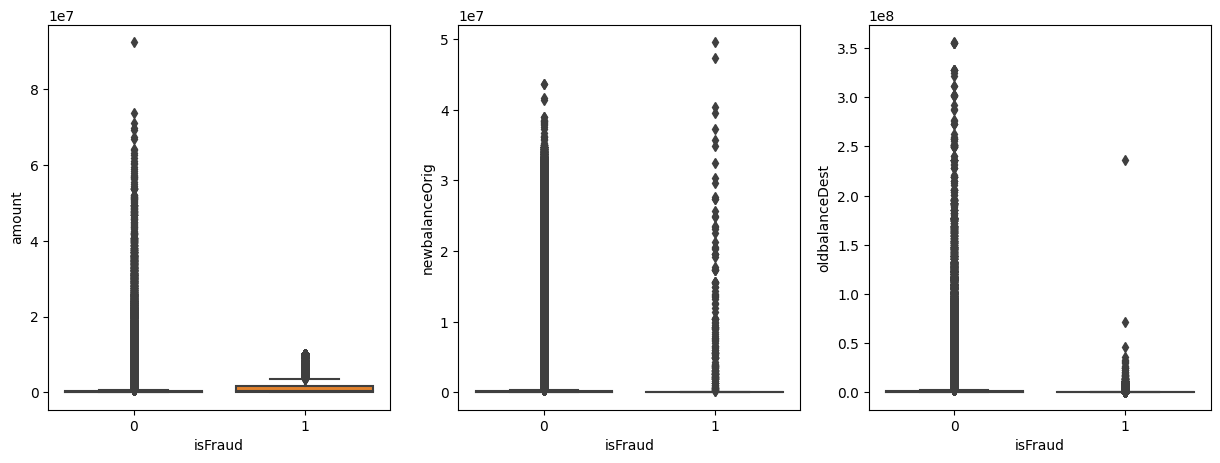

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sb.boxplot(data=df,y="amount",x="isFraud")
plt.subplot(1,3,2)
sb.boxplot(data=df,y="newbalanceOrig",x="isFraud")
plt.subplot(1,3,3)
sb.boxplot(data=df,y="oldbalanceDest",x="isFraud")

## Now we encode it

In [39]:
df = pd.get_dummies(data=df,columns=["type"])

In [40]:
df.head()

amount  newbalanceOrig  oldbalanceDest  isFraud  type_CASH_OUT  \
0   9839.64       160296.36             0.0        0              0   
1   1864.28        19384.72             0.0        0              0   
2    181.00            0.00             0.0        1              0   
3    181.00            0.00         21182.0        1              1   
4  11668.14        29885.86             0.0        0              0   

   type_OTHER  type_TRANSFER  
0           1              0  
1           1              0  
2           0              1  
3           0              0  
4           1              0

## Now we head towards separating independent and dependent attributes

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(df.drop("isFraud",axis=1), df.isFraud, stratify = df.isFraud)

In [44]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=1)
x_train,y_train=sm.fit_resample(x_train,y_train)

In [46]:
y_train.value_counts()

0    4765805
1    4765805
Name: isFraud, dtype: int64

In [47]:
x_train,x_test,y_train,y_test = train_test_split(df.drop("isFraud",axis=1),df.isFraud)

In [48]:
x_train[:5]

amount  newbalanceOrig  oldbalanceDest  type_CASH_OUT  \
5526897  1261190.98            0.00      1446147.33              0   
4655577   160571.69            0.00            0.00              0   
2335362   133198.13            0.00      2041863.19              0   
6347562     6134.73       127617.62            0.00              0   
2603800    40003.97            0.00      2451784.56              0   

         type_OTHER  type_TRANSFER  
5526897           0              1  
4655577           0              1  
2335362           0              1  
6347562           1              0  
2603800           0              1

In [49]:
x_test[:5]

amount  newbalanceOrig  oldbalanceDest  type_CASH_OUT  type_OTHER  \
4050100  221593.38            0.00       570648.80              1           0   
2108922    3339.31            0.00            0.00              0           1   
1464699   67597.61            0.00       154195.21              1           0   
2854769   97421.58        25720.42      3719567.40              1           0   
4078559   19398.66       126518.72            0.00              0           1   

         type_TRANSFER  
4050100              0  
2108922              0  
1464699              0  
2854769              0  
4078559              0

## Preprocessing

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

## Model Building

In [52]:
model_LR = LogisticRegression()
model_LR.fit(x_train,y_train)

LogisticRegression()

## Prediction

In [53]:
prediction_LR = model_LR.predict(x_test)
prediction_LR

array([0, 0, 0, ..., 0, 0, 0])

## Evaluation

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve

### Confusion Matrix

In [55]:
confusion_matrix(y_test,prediction_LR)

array([[1588660,       3],
       [   1968,      24]])

### Classification Report

In [56]:
print(classification_report(y_test,prediction_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588663
           1       0.89      0.01      0.02      1992

    accuracy                           1.00   1590655
   macro avg       0.94      0.51      0.51   1590655
weighted avg       1.00      1.00      1.00   1590655



### Accuracy Score

In [58]:
accuracy_score(y_test,prediction_LR)

0.9987608878103674

### ROC Curve

In [61]:
roc_curve(y_test,prediction_LR)

(array([0.00000000e+00, 1.88838036e-06, 1.00000000e+00]),
 array([0.        , 0.01204819, 1.        ]),
 array([2, 1, 0]))

# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

## Model Building

In [64]:
model_DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model_DTC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Prediction

In [65]:
prediction_DTC = model_DTC.predict(x_test)

##

## Evaluation

### Confusion Matrix

In [67]:
confusion_matrix(y_test,prediction_DTC)

array([[1587084,    1579],
       [   1535,     457]])

### Classification Report

In [68]:
print(classification_report(y_test,prediction_DTC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588663
           1       0.22      0.23      0.23      1992

    accuracy                           1.00   1590655
   macro avg       0.61      0.61      0.61   1590655
weighted avg       1.00      1.00      1.00   1590655



### Accuracy Score

In [69]:
accuracy_score(y_test,prediction_DTC)

0.9980423159013111

### ROC Curve

In [70]:
roc_curve(y_test,prediction_DTC)

(array([0.00000000e+00, 9.93917527e-04, 1.00000000e+00]),
 array([0.        , 0.22941767, 1.        ]),
 array([2, 1, 0]))

# Random Forest Algorithm

In [71]:
from sklearn.ensemble import RandomForestClassifier

## Model Building

In [73]:
model_RFC = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model_RFC.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Prediction

In [74]:
prediction_RFC = model_RFC.predict(x_test)

## Evaluation

### Confusion Matrix

In [75]:
confusion_matrix(y_test,prediction_RFC)

array([[1587812,     851],
       [   1558,     434]])

### Classification Report

In [76]:
print(classification_report(y_test,prediction_RFC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588663
           1       0.34      0.22      0.26      1992

    accuracy                           1.00   1590655
   macro avg       0.67      0.61      0.63   1590655
weighted avg       1.00      1.00      1.00   1590655



### Accuracy Score

In [77]:
accuracy_score(y_test,prediction_RFC)

0.9984855295460047

### ROC Curve

In [78]:
roc_curve(y_test,prediction_RFC)

(array([0.00000000e+00, 5.35670561e-04, 1.00000000e+00]),
 array([0.        , 0.21787149, 1.        ]),
 array([2, 1, 0]))

# K-NN Algorithm

In [79]:
from sklearn.neighbors import KNeighborsClassifier

## Model Building

In [80]:
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(x_train,y_train)

KNeighborsClassifier()

## Prediction

In [81]:
prediction_KNN = model_KNN.predict(x_test)
prediction_KNN

array([0, 0, 0, ..., 0, 0, 0])

## Evaluation

### Confusion Matrix

In [82]:
confusion_matrix(y_test,prediction_KNN)

array([[1588526,     137],
       [   1619,     373]])

### Classification Matrix

In [83]:
print(classification_report(y_test,prediction_KNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588663
           1       0.73      0.19      0.30      1992

    accuracy                           1.00   1590655
   macro avg       0.87      0.59      0.65   1590655
weighted avg       1.00      1.00      1.00   1590655



### Accuracy Score

In [84]:
accuracy_score(y_test,prediction_KNN)

0.9988960522552031

### ROC Curve

In [85]:
roc_curve(y_test,prediction_KNN)

(array([0.00000000e+00, 8.62360362e-05, 1.00000000e+00]),
 array([0.      , 0.187249, 1.      ]),
 array([2, 1, 0]))

# Conclusion

- Logistics Regression Able to predict at 99% accuracy while recall seems to be 01%
- Descision Tree Algorithm Able to predict at 99% accuracy while recall seems to be 23%
- Random Forest Algorithm Able to predict at 99% accuracy while recall seems to be 23%
- K-NN Algorithm Able to predict at 99% accuracy while recall seems to be 19%

